In [1]:
%%html
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Oswald:wght@200;300;400&display=swap" rel="stylesheet">
<link href="https://fonts.googleapis.com/css2?family=Lobster&display=swap" rel="stylesheet">


<style>

    h1 {
        color: #27374D;
        font-size: 100px;
        font-family: 'Lobster', cursive;
        text-align: center;
        text-decoration: underline;


    }
    
    p{
        margin:10px 50px;
        background-color: #EDF1D6;
        color:#191825;
        font-size:medium;
        font-family: 'Oswald', sans-serif;
    }
    hr{
        background-color:#27374D;
        color: #27374D;
        border-width: 7px;
        width: 70%;
    }
</style>



<h1>Libraries import</h1>
<hr>

In [2]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
from itertools import cycle
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline

<h1>Data Acquisition</h1>
<hr>

<p>Python code for creating an array to store links downloaded from a website using Google Drive.
Utilizes Selenium and ChromeDriver for web scraping.
Initializes the linksToPages array.
Iterates over multiple pages of a Udemy website.
Parses the page source using BeautifulSoup.
Appends course links to the linksToPages array.
ChromeDriver is used to control the Chrome browser.
Closes the ChromeDriver instance after each page.</p>

In [ ]:
linksToPages = []
options = Options()
service = Service('C:\Program Files\pro1\chromedriver.exe')
# driver = webdriver.Chrome(service=service, options=options)
link = "https://www.udemy.com/courses/development/?p="


for i in range(0,626):
    driver = webdriver.Chrome(service=service, options=options)
    url = link + str(i)
    driver.get(url)
    time.sleep(2)
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.course-list--container--FuG0T')))
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    mtag = soup.find("div", attrs={"class": "course-list--container--FuG0T"})
#     mtag.find("div", attrs={"data-purpose": "top-companies-wrapper"}).decompose()
    for t in mtag.find_all("div",attrs={'class':'popper-module--popper--2BpLn'}):
        course = t.find('a')
        linksToPages.append(course['href'])
 
    driver.quit()



Reads the content of a CSV file named 'full_links.csv' into the variable linksToPages.
The data in the CSV file is loaded into the linksToPages object.

In [3]:
Links = pd.read_csv('data/full_links.csv', encoding='latin-1')
linksToPages = Links.Links
linksToPages

0                       /course/complete-python-bootcamp/
1          /course/the-complete-web-development-bootcamp/
2                     /course/the-web-developer-bootcamp/
3                               /course/100-days-of-code/
4                /course/the-complete-guide-to-angular-2/
                              ...                        
9867                /course/solving-games-in-java-part-i/
9868         /course/swiftui-series-core-data-in-swiftui/
9869    /course/quick-install-or-migrate-wordpress-to-...
9870    /course/build-a-todolist-fast-with-react-and-a...
9871    /course/numpypandas-and-data-visualisation-usi...
Name: Links, Length: 9872, dtype: object

Initializes empty lists for storing various attributes related to courses.

In [ ]:
course_name = []
category = []
sub_category = []
stars = []
ratings = []
students = []
creator = []
last_update = []
language = []
num_translations = []
original_price = []
discounted_price = []
course_duration_hours = []
num_lessons = []
average_lesson_duration = []

Sets the path of the ChromeDriver executable file as 'C:\Program Files\pro1\chromedriver.exe' and assigns it to the service variable.
Initializes an object named options for configuring additional options related to the ChromeDriver.

In [ ]:
service = Service('C:\Program Files\pro1\chromedriver.exe')
options = Options()




The code snippet appears to be part of a larger script that performs web scraping on the Udemy website. It utilizes Selenium and ChromeDriver to extract various details of courses. Here is a general summary of the code:
It sets up a ChromeDriver instance and initializes some variables.
It loops through a collection of links obtained from the linksToPages object.
For each link, it opens a new Chrome browser window, maximizes it, and navigates to the Udemy course page.
It waits for specific elements to load on the page before extracting relevant information such as the course name, category, sub-category, ratings, number of students, course duration, and more.
The extracted information is stored in corresponding lists.
After processing each link, the ChromeDriver instance is closed.
A counter variable keeps track of the progress.

PS: The code maximizes the Chrome browser window to ensure consistent visibility and accessibility of elements on the Udemy website. This decision was made because the site's layout and department organization can vary depending on the screen resolution. Maximizing the window helps ensure the code functions correctly across different computer setups.

The save_file function creates a pandas DataFrame with the provided column names and their corresponding data. The purpose of this function is to back up the data in case the crawling process crashes. The function returns the DataFrame df.

In [ ]:
def save_file():
    df = pd.DataFrame({'Course Name':course_name,'Category':category,'Sub Category':sub_category,
                   'Overall Rating':stars,'Number of Ratings':ratings
                   ,'Students Enrolled':students,'Created By':creator,'Last Update':last_update,'Language':language
                   ,'Number of Translations':num_translations,'Original Price':original_price
                   ,'Discounted Price':discounted_price,'Course Duration':course_duration_hours,'Number of Lessons':num_lessons})
    return df

In [ ]:
# driver = webdriver.Chrome(service=service, options=options)
counter = 0
for link in tqdm(linksToPages):
    if (counter%100) == 0:
        file = save_file()
        file.to_csv(r'C:\Udemy-Project\data\Backup.csv')
    driver = webdriver.Chrome(service=service, options=options)
    driver.maximize_window()
    url = 'https://www.udemy.com' + link
    driver.get(url)
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    time.sleep(random.randint(1,4))
    try:
        course_name.append(driver.find_element(By.TAG_NAME,'h1').text.strip())
    except:
        course_name.append("None")
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'div.topic-menu')))
    time.sleep(random.randint(1,4))
    mtag = driver.find_element(By.CSS_SELECTOR,'div.topic-menu')
    categories = mtag.find_elements(By.TAG_NAME,'a')
    category.append(categories[1].text.strip())
    try:
        sub_category.append(categories[2].text.strip())
    except:
        sub_category.append("None")
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.clp-lead__element-item--row')))
    time.sleep(random.randint(1,4))
    mtag = driver.find_element(By.CSS_SELECTOR,'div.clp-lead__element-item--row')
    reviews = mtag.find_elements(By.TAG_NAME,'span')
    stars.append(reviews[2].text.strip())
    ratings.append(reviews[3].text.strip().split()[0].replace('(',''))
    students.append(driver.find_element(By.CSS_SELECTOR,'div.enrollment').text.strip().split()[0])
    creator.append(driver.find_element(By.CSS_SELECTOR,'a.ud-instructor-links').text.strip())
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.clp-lead__element-meta')))
    time.sleep(random.randint(1,4))
    mtag = driver.find_element(By.CSS_SELECTOR,'div.clp-lead__element-meta')
    items = mtag.find_elements(By.CSS_SELECTOR,'div.clp-lead__element-item')
    try:
        last_update.append(items[0].text.strip().split()[-1])
    except:
        last_update.append("None")
    try:
        language.append(items[1].text.strip())
    except:
        language.append("None")
    try:
        num_translations.append(items[2].text.strip().replace('\n',''))
    except:
        num_translations.append("None")
    try:
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.price-text--container--103D9')))
        time.sleep(random.randint(1,4))
        mtag = driver.find_element(By.CSS_SELECTOR,'div.price-text--container--103D9')
        prices = mtag.find_elements(By.TAG_NAME,'span')
        discounted_price.append(prices[1].text.strip())
        try:
            original_price.append(prices[4].text.strip())
        except:
            original_price.append(prices[1].text.strip())
            discounted_price[-1] = 'None'
    except:
        original_price.append("None")
        discounted_price.append("None")
    
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.incentives--incentives-container--1QKGj')))
    time.sleep(random.randint(1,4))
    mtag = driver.find_element(By.CSS_SELECTOR,'div.incentives--incentives-container--1QKGj')
    details = mtag.find_elements(By.TAG_NAME,'li')
    try:
        course_duration_hours.append(details[0].text.strip().split("on")[0].strip())
    except:
        course_duration_hours.append('None')
    try:
        num_lessons.append(driver.find_element(By.CSS_SELECTOR, 'span[data-purpose="num-articles"]').text.strip().split()[0])
    except:
        num_lessons.append("None")
    driver.quit()
    counter+=1

The code reads a CSV file named 'FullData.csv' and assigns its contents to a DataFrame named df.

In [4]:
df = pd.read_csv('data/FullData.csv')

The code modifies the 'Original Price' and 'Discounted Price' columns in the DataFrame df. It removes any non-numeric characters from the values using regular expressions. The column names are then renamed to 'Original Price Per NIS' and 'Discounted Price Per NIS', respectively.

In [5]:
df['Original Price'] = df['Original Price'].replace('[^0-9.]', '', regex=True)
df['Discounted Price'] = df['Discounted Price'].replace('[^0-9.]', '', regex=True)
df.rename(columns = {'Original Price':'Original Price Per NIS'},inplace = True)
df.rename(columns = {'Discounted Price':'Discounted Price Per NIS'},inplace = True)
df

,Course Name,Category,Subcategory,Overall Rating,Number of Ratings,Students Enrolled,Created By,Last Update,Language,Number of Translations,Original Price Per NIS,Discounted Price Per NIS,Course Duration,Number of Lessons
0,The Complete Python Bootcamp From Zero to Hero...,Programming Languages,Python,4.6,"463,032","1,721,045",Jose Portilla,3.2021,English,"English [Auto], Arabic [Auto], 14 more",449.90,53.90,22 hours,14
1,The Complete 2023 Web Development Bootcamp,Web Development,None,4.7,"285,582","963,938",Dr. Angela Yu,5.2023,English,"English, Arabic [Auto], 13 more",399.90,45.90,65 hours,74
2,The Web Developer Bootcamp 2023,Web Development,None,4.7,"258,589","863,143",Colt Steele,5.2023,English,"English [Auto], Arabic [Auto], 14 more",399.90,45.90,73.5 hours,54
3,100 Days of Code: The Complete Python Pro Boot...,Programming Languages,Python,4.7,"198,608","870,059",Dr. Angela Yu,5.2023,English,"English, Arabic [Auto], 16 more",429.90,53.90,54 hours,219
4,Angular - The Complete Guide (2023 Edition),Web Development,Angular,4.6,"184,948","682,323",Maximilian Schwarzmֳ¼ller,5.2023,English,"English [CC], Bulgarian [Auto], 22 more",399.90,45.90,35 hours,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,Mastering The Python Basics 2023 Bootcamp,Programming Languages,Python,4.2,31,"9,002",Tanmay Panchal,12.2022,English,NaN,349.90,43.90,2 hours,1
9894,Accelerated BIM Modeling with Revit Ducting an...,Software Engineering,Dynamo BIM,3.7,31,177,Enrique Galicia,3.2023,English,English [Auto],199.90,43.90,2.5 hours,1
9895,Data Structures and Algorithms using Java and ...,Software Engineering,Data Structures,3.8,31,292,Faisal Memon,4.2023,English,English [Auto],349.90,43.90,9 hours,1
9896,Essential SQL Server Development Tips for SQL ...,Database Design & Development,Database Programming,4.4,31,187,Artemakis Artemiou,4.2023,English,English [Auto],349.90,43.90,5 hours,1


The code iterates through each column in the DataFrame df and replaces the values 'None' and empty strings with NaN (missing value) using the replace() function. After this replacement, the info() function is called to provide information about the DataFrame, including the data types of each column and the count of non-null values.

In [6]:
for column in df.columns:
    df[column] = df[column].replace({'None': np.nan, '': np.nan})

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Name               9898 non-null   object 
 1   Category                  9898 non-null   object 
 2   Subcategory               9750 non-null   object 
 3   Overall Rating            9898 non-null   float64
 4   Number of Ratings         9898 non-null   object 
 5   Students Enrolled         9898 non-null   object 
 6   Created By                9898 non-null   object 
 7   Last Update               9898 non-null   float64
 8   Language                  9898 non-null   object 
 9   Number of Translations    9191 non-null   object 
 10  Original Price Per NIS    9880 non-null   object 
 11  Discounted Price Per NIS  9698 non-null   object 
 12  Course Duration           9886 non-null   object 
 13  Number of Lessons         5756 non-null   object 
dtypes: float

it removes the duplicate rows from the DataFrame using the drop_duplicates() method and assigns the updated DataFrame back to the variable df.

In [8]:
print('duplicates:',df.duplicated().sum())
df = df.drop_duplicates()

duplicates: 92


The code fills the missing values in the 'Number of Lessons' column of the DataFrame df with the value '1' and prints information about the DataFrame using the info() method.

In [9]:
df['Number of Lessons'] = df['Number of Lessons'].fillna('1')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9897
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Name               9806 non-null   object 
 1   Category                  9806 non-null   object 
 2   Subcategory               9658 non-null   object 
 3   Overall Rating            9806 non-null   float64
 4   Number of Ratings         9806 non-null   object 
 5   Students Enrolled         9806 non-null   object 
 6   Created By                9806 non-null   object 
 7   Last Update               9806 non-null   float64
 8   Language                  9806 non-null   object 
 9   Number of Translations    9111 non-null   object 
 10  Original Price Per NIS    9788 non-null   object 
 11  Discounted Price Per NIS  9607 non-null   object 
 12  Course Duration           9794 non-null   object 
 13  Number of Lessons         9806 non-null   object 
dtypes: float

/var/folders/8c/nsq50s4d2c98lz6jzsqnkb340000gn/T/ipykernel_92002/1787250802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Lessons'] = df['Number of Lessons'].fillna('1')


In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8785 entries, 0 to 9897
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Name               8785 non-null   object 
 1   Category                  8785 non-null   object 
 2   Subcategory               8785 non-null   object 
 3   Overall Rating            8785 non-null   float64
 4   Number of Ratings         8785 non-null   object 
 5   Students Enrolled         8785 non-null   object 
 6   Created By                8785 non-null   object 
 7   Last Update               8785 non-null   float64
 8   Language                  8785 non-null   object 
 9   Number of Translations    8785 non-null   object 
 10  Original Price Per NIS    8785 non-null   object 
 11  Discounted Price Per NIS  8785 non-null   object 
 12  Course Duration           8785 non-null   object 
 13  Number of Lessons         8785 non-null   object 
dtypes: float

The function get_translation_count calculates the count of translations based on a given translation_string. It removes leading/trailing whitespace, extracts numeric values, removes '{AUTO}' from the string, splits it by commas, and counts the translations. The function returns the total count.

In [11]:
def get_translation_count(translation_string):
    count = 0

    translation_string = translation_string.strip()
    match = re.search(r'\d+', translation_string)
    if match:
        count += int(match.group())  # Extract the numeric value

    translation_string = re.sub(r'\[Auto\]', '', translation_string)
    translations = translation_string.split(',')
    count += max(0, len(translations) - 1)  # Exclude the last empty element

    if ' more' not in translation_string:
        count += 1

    return count

The code snippet performs the following transformations on the DataFrame df:

Converts the 'Number of Ratings' and 'Students Enrolled' columns to numeric values by removing commas.
Calculates the count of translations in the 'Number of Translations' column.
Converts the 'Last Update' column to a string type.
Converts multiple columns ('Overall Rating', 'Number of Ratings', 'Students Enrolled', 'Original Price Per NIS', 'Discounted Price Per NIS', 'Number of Lessons', 'Course Duration') to numeric types.

In [12]:
df['Number of Ratings'] = df['Number of Ratings'].astype(str).str.replace(',', '')
df['Students Enrolled'] = df['Students Enrolled'].astype(str).str.replace(',', '')
df['Number of Translations'] = df['Number of Translations'].apply(get_translation_count)
df['Last Update'] = df['Last Update'].astype(str)
df['Overall Rating'] = pd.to_numeric(df['Overall Rating'])
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'])
df['Students Enrolled'] = pd.to_numeric(df['Students Enrolled'])
df['Original Price Per NIS'] = pd.to_numeric(df['Original Price Per NIS'])
df['Discounted Price Per NIS'] = pd.to_numeric(df['Discounted Price Per NIS'])
df['Number of Lessons'] = pd.to_numeric(df['Number of Lessons'])
df['Course Duration'] = df['Course Duration'].str.split().str[0].astype(float)


The df.info() function provides information about the DataFrame df, including the data types and non-null values of each column.
The df.shape attribute returns the dimensions of the DataFrame df in the form (rows, columns), indicating the number of rows and columns in the DataFrame.

In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8785 entries, 0 to 9897
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Name               8785 non-null   object 
 1   Category                  8785 non-null   object 
 2   Subcategory               8785 non-null   object 
 3   Overall Rating            8785 non-null   float64
 4   Number of Ratings         8785 non-null   int64  
 5   Students Enrolled         8785 non-null   int64  
 6   Created By                8785 non-null   object 
 7   Last Update               8785 non-null   object 
 8   Language                  8785 non-null   object 
 9   Number of Translations    8785 non-null   int64  
 10  Original Price Per NIS    8785 non-null   float64
 11  Discounted Price Per NIS  8785 non-null   float64
 12  Course Duration           8785 non-null   float64
 13  Number of Lessons         8785 non-null   int64  
dtypes: float

(8785, 14)

In [14]:
df

,Course Name,Category,Subcategory,Overall Rating,Number of Ratings,Students Enrolled,Created By,Last Update,Language,Number of Translations,Original Price Per NIS,Discounted Price Per NIS,Course Duration,Number of Lessons
0,The Complete Python Bootcamp From Zero to Hero...,Programming Languages,Python,4.6,463032,1721045,Jose Portilla,3.2021,English,16,449.9,53.9,22.0,14
3,100 Days of Code: The Complete Python Pro Boot...,Programming Languages,Python,4.7,198608,870059,Dr. Angela Yu,5.2023,English,18,429.9,53.9,54.0,219
4,Angular - The Complete Guide (2023 Edition),Web Development,Angular,4.6,184948,682323,Maximilian Schwarzmֳ¼ller,5.2023,English,24,399.9,45.9,35.0,48
5,"React - The Complete Guide (incl Hooks, React ...",Programming Languages,React JS,4.6,184793,734453,Academind by Maximilian Schwarzmֳ¼ller,5.2023,English,26,399.9,45.9,48.0,50
6,Java Programming Masterclass updated to Java 17,Programming Languages,Java,4.6,181148,774929,Tim Buchalka,5.2023,English,24,429.9,53.9,114.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,Applied ML: Build NLP text embeddings using py...,Data Science,Natural Language Processing,3.9,31,1478,Your Data HQ,11.2022,English,1,69.9,43.9,36.0,1
9894,Accelerated BIM Modeling with Revit Ducting an...,Software Engineering,Dynamo BIM,3.7,31,177,Enrique Galicia,3.2023,English,1,199.9,43.9,2.5,1
9895,Data Structures and Algorithms using Java and ...,Software Engineering,Data Structures,3.8,31,292,Faisal Memon,4.2023,English,1,349.9,43.9,9.0,1
9896,Essential SQL Server Development Tips for SQL ...,Database Design & Development,Database Programming,4.4,31,187,Artemakis Artemiou,4.2023,English,1,349.9,43.9,5.0,1


<h1>Data Visualization</h1>
<hr>

<Figure size 640x480 with 0 Axes>

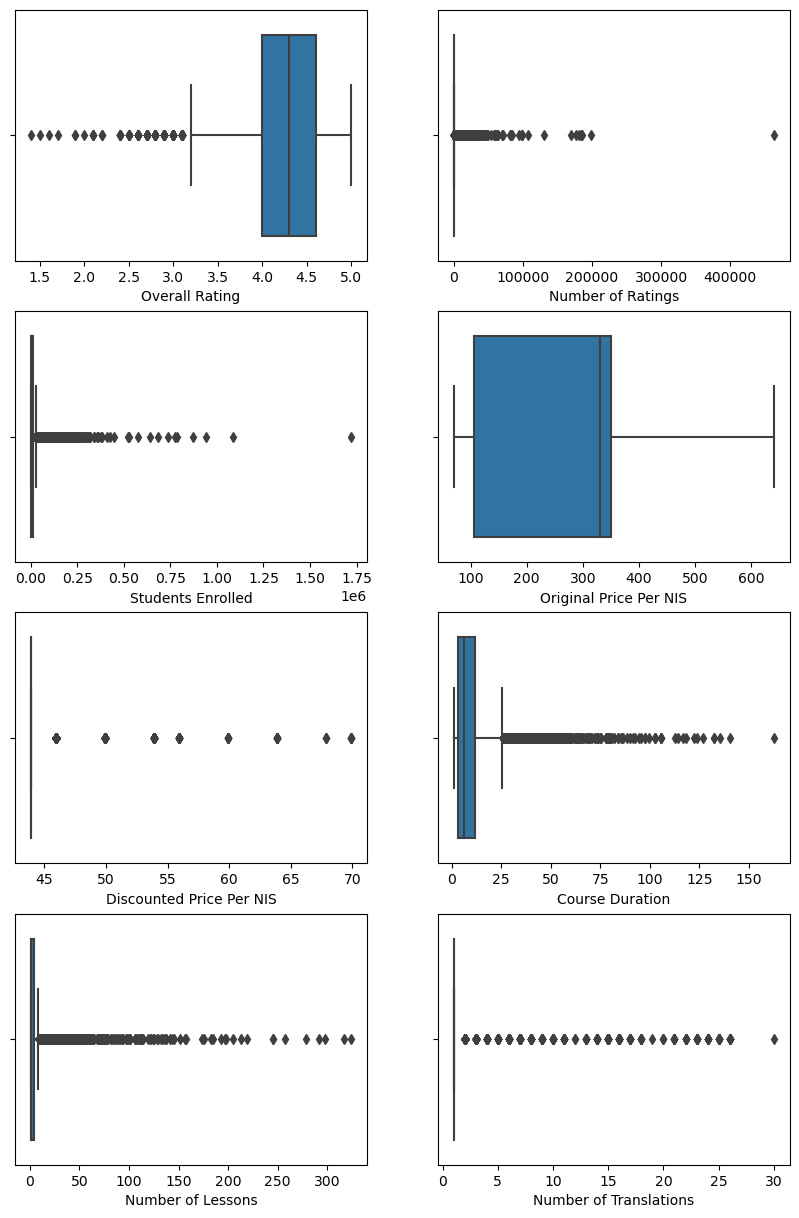

In [15]:
plt.clf()
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
sns.boxplot(data=df, x='Overall Rating', ax=axs[0, 0])
sns.boxplot(data=df, x='Number of Ratings', ax=axs[0, 1])
sns.boxplot(data=df, x='Students Enrolled', ax=axs[1, 0])
sns.boxplot(data=df, x='Original Price Per NIS', ax=axs[1, 1])
sns.boxplot(data=df, x='Discounted Price Per NIS', ax=axs[2, 0])
sns.boxplot(data=df, x='Course Duration', ax=axs[2, 1])
sns.boxplot(data=df, x='Number of Lessons', ax=axs[3, 0])
sns.boxplot(data=df, x='Number of Translations', ax=axs[3, 1])


plt.show()

The pie chart represents the distribution of categories based on the number of courses in each category. "Web Development" has the highest number of courses, indicating that it is the category with the largest representation in the dataset.

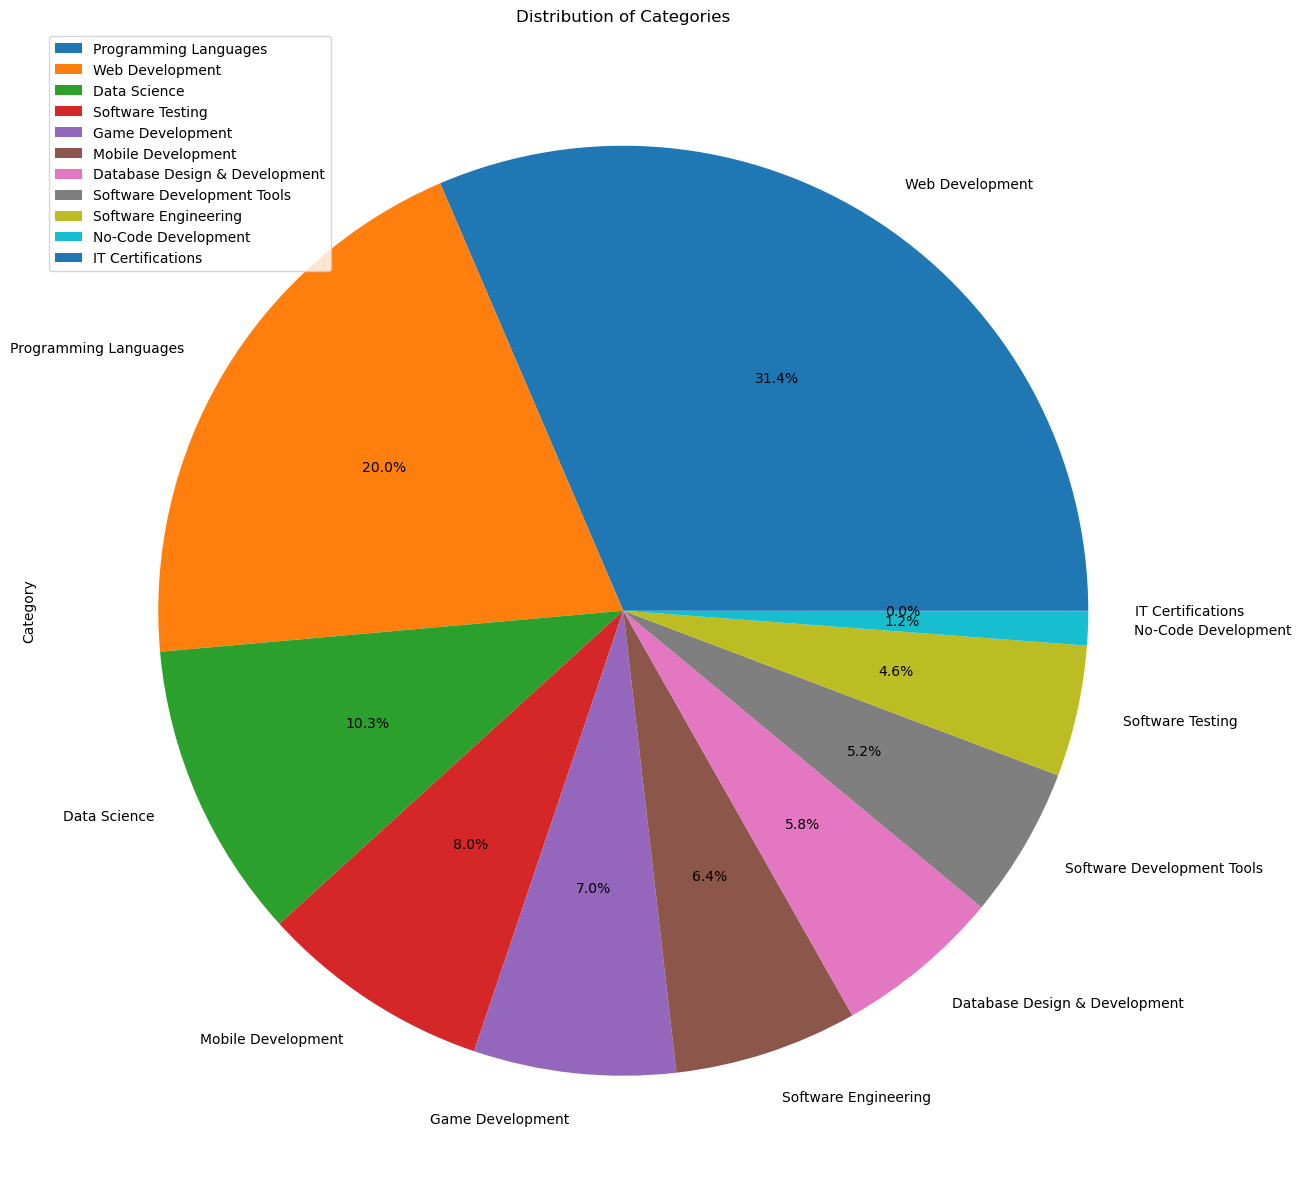

In [16]:
fig=plt.figure(figsize=(15,20))

df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.legend(df['Category'].unique())
plt.show()


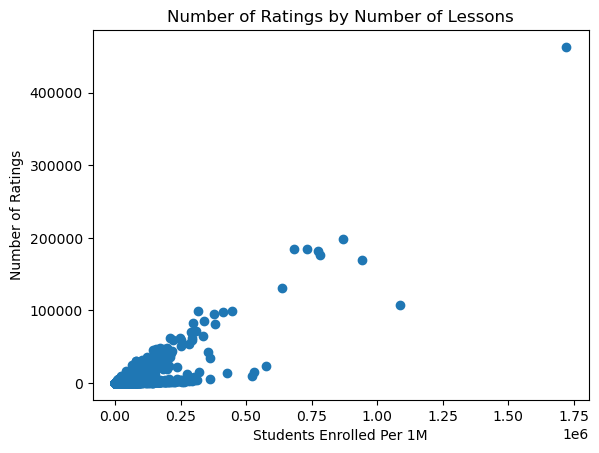

In [17]:
plt.scatter(df['Students Enrolled'], df['Number of Ratings'])
plt.xlabel('Students Enrolled Per 1M')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Number of Lessons')
plt.show()

The bar chart represents the total number of students enrolled in each category of courses. The category of programming language courses has the highest number of students enrolled, while the IT category has the lowest number of students.

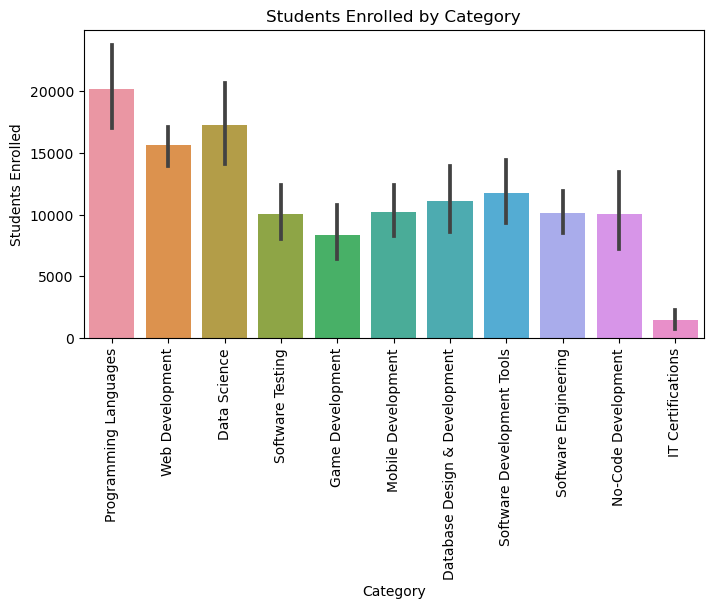

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Students Enrolled', data=df)
plt.xlabel('Category')
plt.ylabel('Students Enrolled')
plt.title('Students Enrolled by Category')
plt.xticks(rotation=90)  
plt.show()

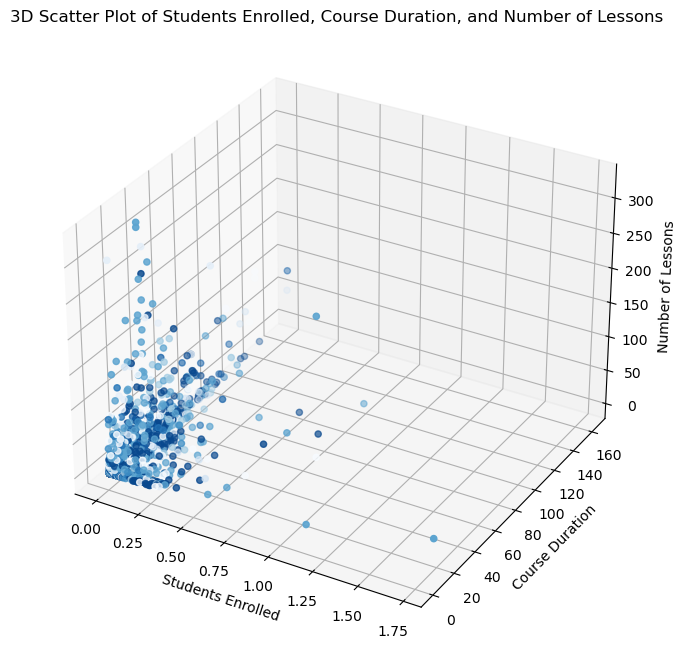

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df['Students Enrolled']
y = df['Course Duration']
z = df['Number of Lessons']

categories = pd.Categorical(df['Category'])
color_map = mpl.colormaps['Blues']

scatter_colors = color_map(categories.codes / len(categories.categories))
ax.scatter(x, y, z, c=scatter_colors)

ax.set_xlabel('Students Enrolled')
ax.set_ylabel('Course Duration')
ax.set_zlabel('Number of Lessons')

plt.title('3D Scatter Plot of Students Enrolled, Course Duration, and Number of Lessons')
plt.show()

In [20]:
df.describe()

,Overall Rating,Number of Ratings,Students Enrolled,Number of Translations,Original Price Per NIS,Discounted Price Per NIS,Course Duration,Number of Lessons
count,8785.000000,8785.000000,8.785000e+03,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000
mean,4.233637,1296.906659,1.462449e+04,1.594195,244.488048,44.400626,10.135344,5.451110
std,0.443573,8469.570276,4.605046e+04,2.724616,127.073161,1.811540,12.420533,15.890468
min,1.400000,31.000000,7.900000e+01,1.000000,69.900000,43.900000,1.000000,1.000000
25%,4.000000,65.000000,9.280000e+02,1.000000,105.900000,43.900000,3.000000,1.000000
50%,4.300000,153.000000,3.465000e+03,1.000000,329.900000,43.900000,6.000000,1.000000
75%,4.600000,501.000000,1.156200e+04,1.000000,349.900000,43.900000,12.000000,4.000000
max,5.000000,463032.000000,1.721045e+06,30.000000,639.900000,69.900000,162.500000,324.000000


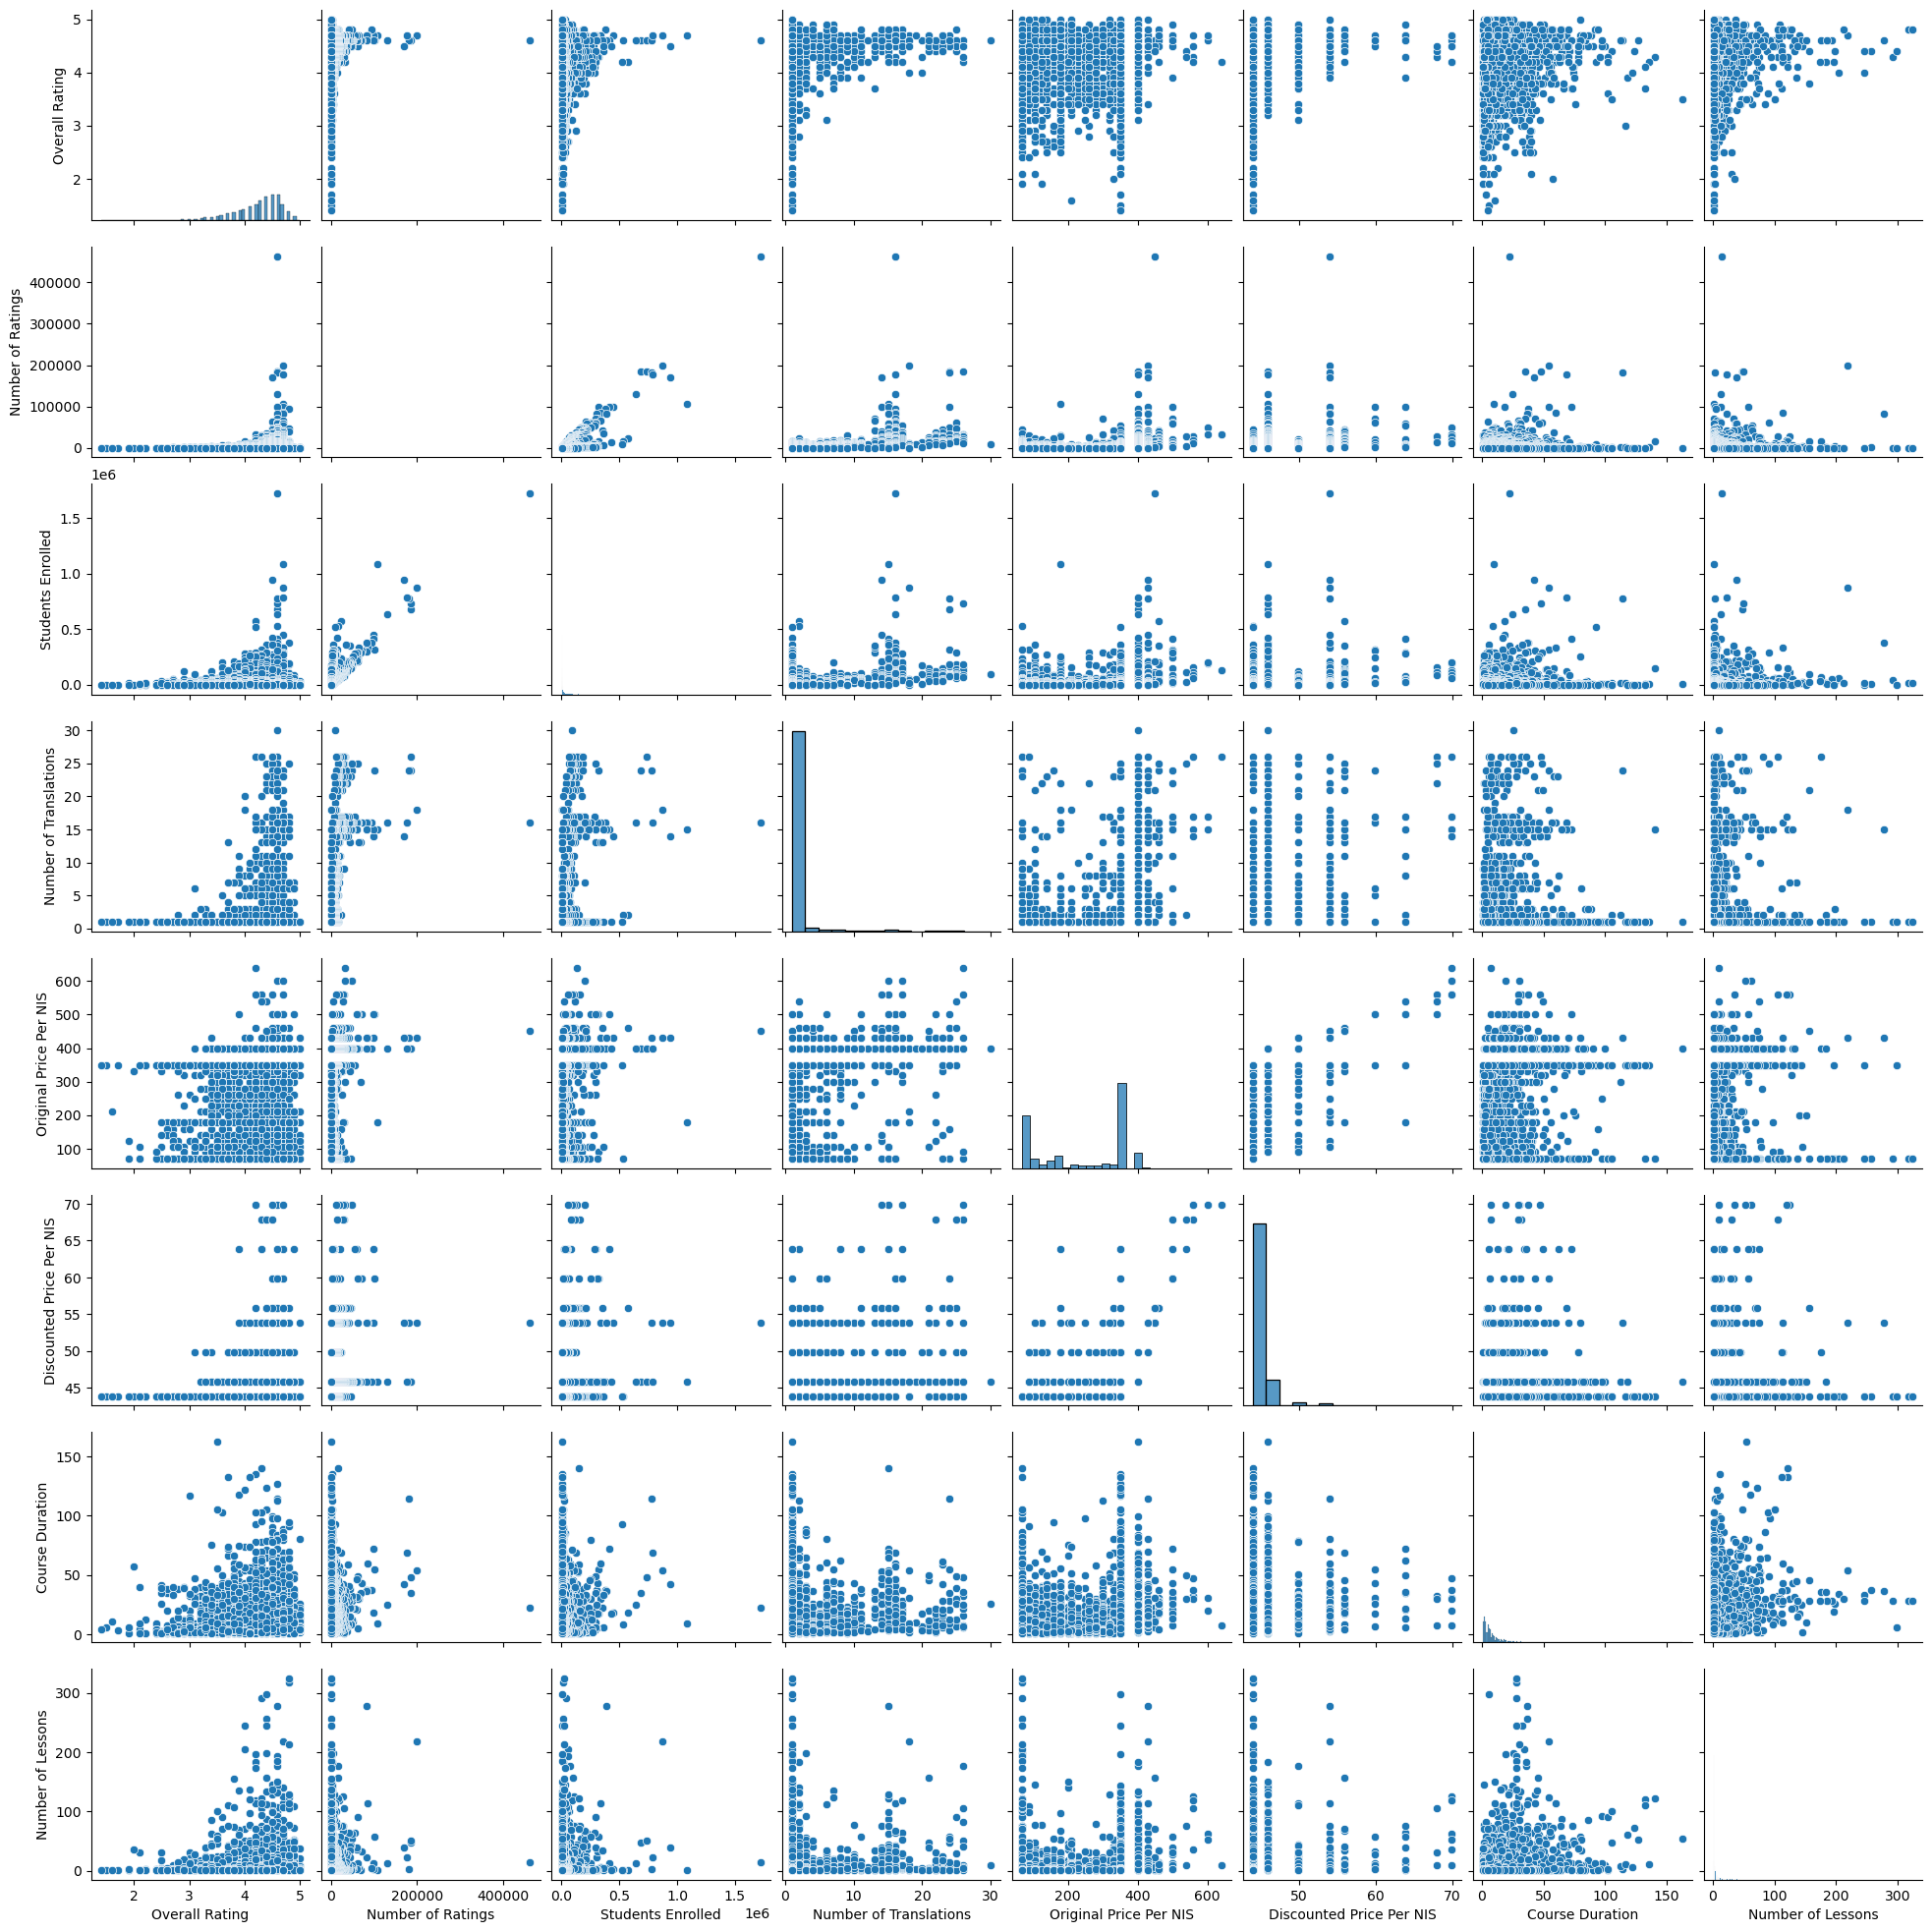

In [21]:
sns.pairplot(df)
plt.show()

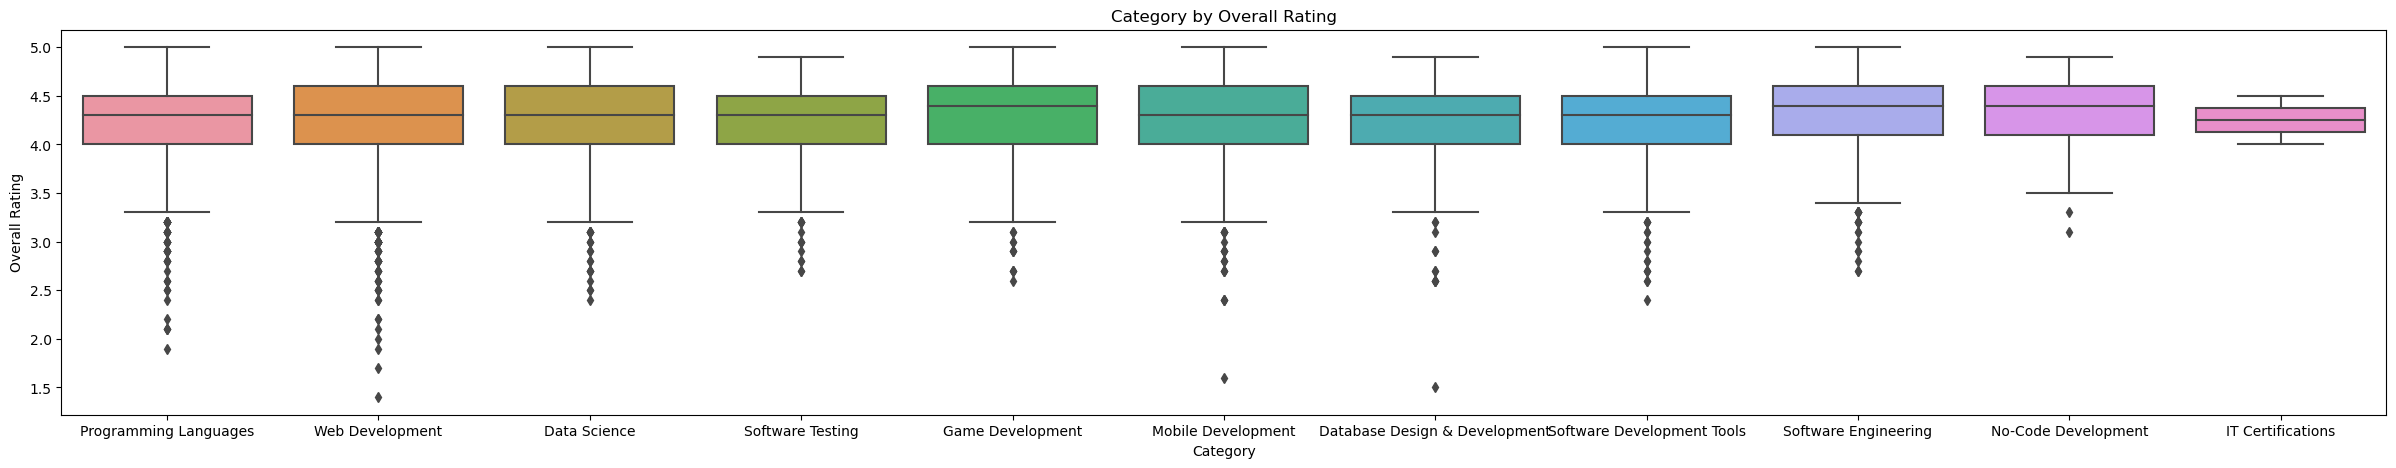

In [22]:
# Boxplot of Category by Overall Rating
fig = plt.figure(figsize=(30, 5))
sns.boxplot(x="Category", y="Overall Rating", data=df)
plt.title('Category by Overall Rating')
plt.show()

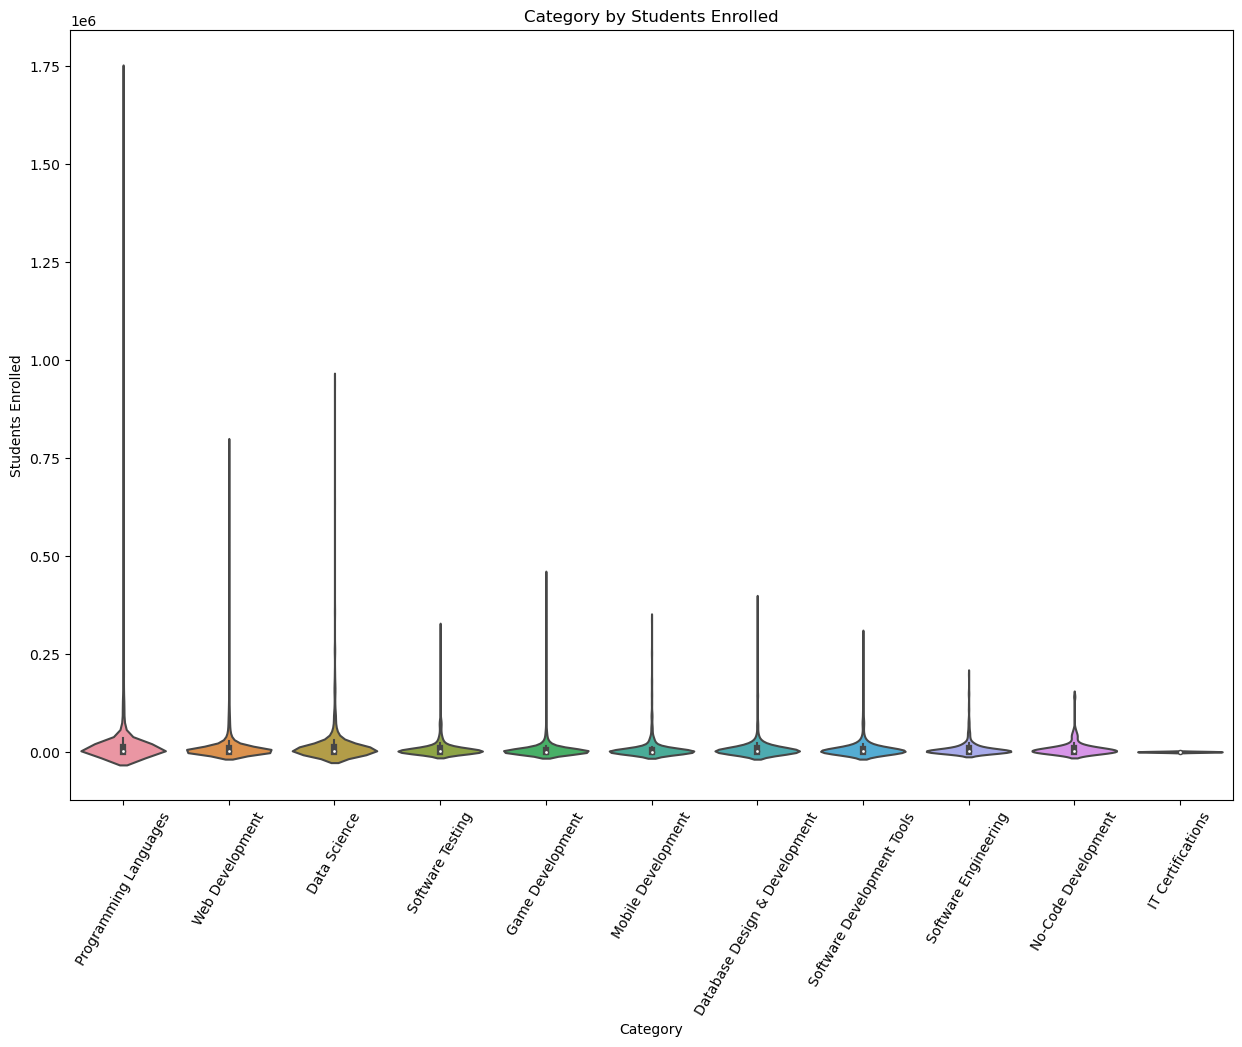

In [23]:

fig = plt.figure(figsize=(15, 10))
sns.violinplot(x="Category", y="Students Enrolled", data=df, scale="width")
plt.title('Category by Students Enrolled')
plt.xticks(rotation=60)

plt.show()



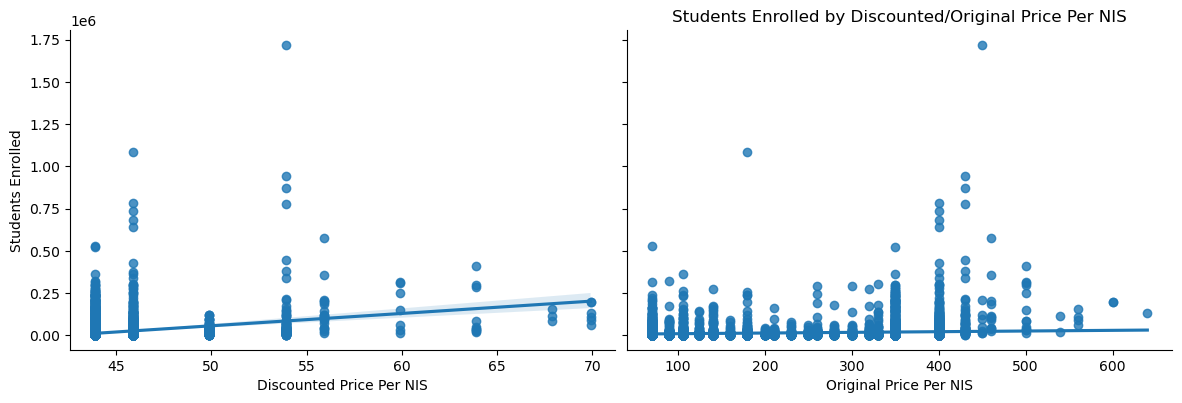

In [24]:
sns.pairplot(data=df, x_vars=['Discounted Price Per NIS', 'Original Price Per NIS'], y_vars='Students Enrolled', kind='reg', height=4, aspect=1.5)
plt.title('Students Enrolled by Discounted/Original Price Per NIS')
plt.show()

The pair plot indicates a strong positive linear relationship between the number of lessons and the number of students enrolled. This suggests that as the number of lessons increases, the number of students enrolled tends to increase as well.

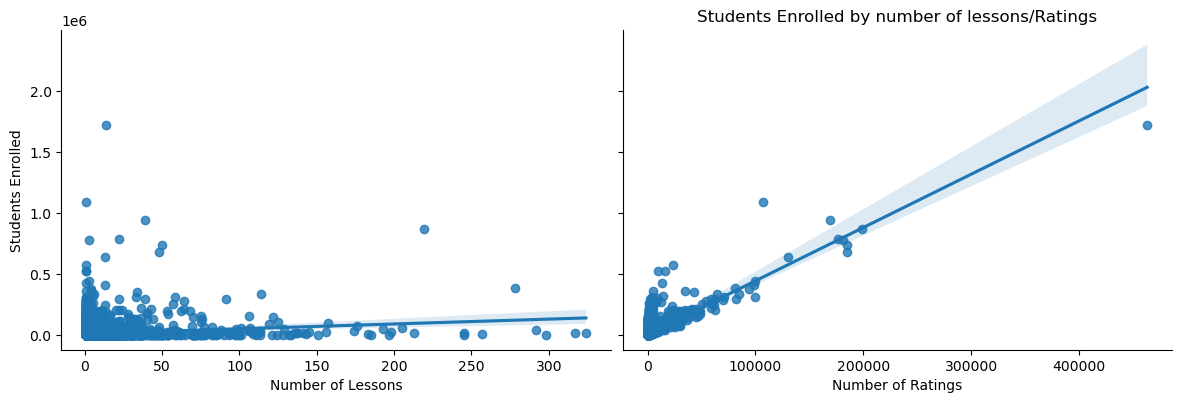

In [25]:
sns.pairplot(data=df, x_vars=['Number of Lessons', 'Number of Ratings'], y_vars='Students Enrolled', kind='reg', height=4, aspect=1.5)
plt.title('Students Enrolled by number of lessons/Ratings')
plt.show()

<u><strong>The highlights regarding the connections between different topics in descending order are:</u></strong>

Strong connection: Students Enrolled and Number of Ratings.
Moderate connections: Number of Translations and Number of Ratings, Number of Ratings and Students Enrolled.
Weak connections: Discounted Price Per NIS and Number of Ratings, Number of Translations and Students Enrolled.
These connections suggest that factors such as ratings, translations, and pricing may influence the popularity and enrollment of courses on Udemy.

/var/folders/8c/nsq50s4d2c98lz6jzsqnkb340000gn/T/ipykernel_92002/1405883499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Students Enrolled'], ax=axs[0])


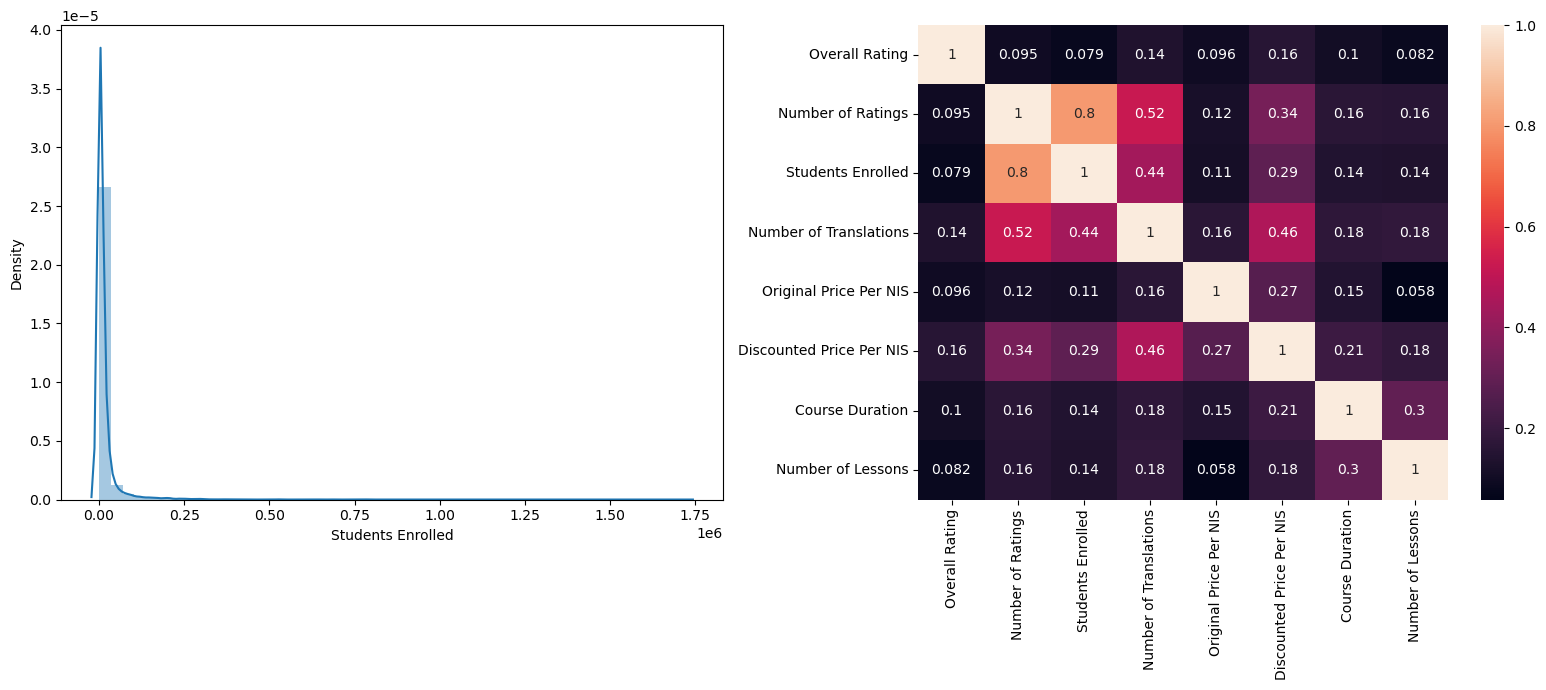

In [26]:

corr = df.corr(numeric_only=True)
fig, axs = plt.subplots(1, 2, figsize=[16, 7])
sns.distplot(df['Students Enrolled'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()
plt.show()


<p>The code filters the 'Last Update' column, marking courses updated in 2023 as 1 and others as 0.</p>

In [27]:
df2 = df.copy()
df2 = df2.drop(['Course Name', 'Created By'], axis=1)
df2['Last Update'] = df2['Last Update'].apply(lambda x: 1 if '2023' in x else 0)


The code uses one-hot encoding to convert categorical variables in the DataFrame into binary columns.

In [28]:
df2 = pd.get_dummies(df2)
df2

,Overall Rating,Number of Ratings,Students Enrolled,Last Update,Number of Translations,Original Price Per NIS,Discounted Price Per NIS,Course Duration,Number of Lessons,Category_Data Science,...,Subcategory_gRPC,Subcategory_iOS Development,Subcategory_iOS Game Development,Subcategory_jQuery,Subcategory_jQuery UI,Subcategory_macOS,Subcategory_npm,Subcategory_pytest,Subcategory_webMethods,Language_English
0,4.6,463032,1721045,0,16,449.9,53.9,22.0,14,0,...,0,0,0,0,0,0,0,0,0,1
3,4.7,198608,870059,1,18,429.9,53.9,54.0,219,0,...,0,0,0,0,0,0,0,0,0,1
4,4.6,184948,682323,1,24,399.9,45.9,35.0,48,0,...,0,0,0,0,0,0,0,0,0,1
5,4.6,184793,734453,1,26,399.9,45.9,48.0,50,0,...,0,0,0,0,0,0,0,0,0,1
6,4.6,181148,774929,1,24,429.9,53.9,114.0,3,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,3.9,31,1478,0,1,69.9,43.9,36.0,1,1,...,0,0,0,0,0,0,0,0,0,1
9894,3.7,31,177,1,1,199.9,43.9,2.5,1,0,...,0,0,0,0,0,0,0,0,0,1
9895,3.8,31,292,1,1,349.9,43.9,9.0,1,0,...,0,0,0,0,0,0,0,0,0,1
9896,4.4,31,187,1,1,349.9,43.9,5.0,1,0,...,0,0,0,0,0,0,0,0,0,1


<h1>Machine learning</h1>
<hr>

The code performs data splitting for machine learning. It assigns the features (X) and the target variable (y) from the DataFrame. Then, it splits the data into training and testing sets using the train_test_split function, with a test size of 20% and a random state of 42. The resulting variables are X_train1, X_test1, y_train1, and y_test1.

In [29]:
X = df2.drop(columns = ['Students Enrolled'])
y = df2['Students Enrolled']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2, random_state=42)

The code snippet fits a Linear Regression model (LM) using the training data. It trains the model by calling the fit method and passing the features (X_train1) and the target variable (y_train1) as arguments. The LM model is now ready to make predictions on new data.

In [30]:
LM = LinearRegression()
LM.fit(X_train1, y_train1)

LinearRegression()

In [31]:
y_pred1 = LM.predict(X_test1)

In [32]:
r2_norm = r2_score(y_test1, y_pred1)
print("Normalized R-squared score:", r2_norm.round(4))

Normalized R-squared score: 0.7268


We saw that we got 0.72 percent and tried to streamline the model following the next command

In [33]:
df3 = df2.copy()
df3 = df3[df3['Students Enrolled'] > 150 ]
df3

,Overall Rating,Number of Ratings,Students Enrolled,Last Update,Number of Translations,Original Price Per NIS,Discounted Price Per NIS,Course Duration,Number of Lessons,Category_Data Science,...,Subcategory_gRPC,Subcategory_iOS Development,Subcategory_iOS Game Development,Subcategory_jQuery,Subcategory_jQuery UI,Subcategory_macOS,Subcategory_npm,Subcategory_pytest,Subcategory_webMethods,Language_English
0,4.6,463032,1721045,0,16,449.9,53.9,22.0,14,0,...,0,0,0,0,0,0,0,0,0,1
3,4.7,198608,870059,1,18,429.9,53.9,54.0,219,0,...,0,0,0,0,0,0,0,0,0,1
4,4.6,184948,682323,1,24,399.9,45.9,35.0,48,0,...,0,0,0,0,0,0,0,0,0,1
5,4.6,184793,734453,1,26,399.9,45.9,48.0,50,0,...,0,0,0,0,0,0,0,0,0,1
6,4.6,181148,774929,1,24,429.9,53.9,114.0,3,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,3.9,31,1478,0,1,69.9,43.9,36.0,1,1,...,0,0,0,0,0,0,0,0,0,1
9894,3.7,31,177,1,1,199.9,43.9,2.5,1,0,...,0,0,0,0,0,0,0,0,0,1
9895,3.8,31,292,1,1,349.9,43.9,9.0,1,0,...,0,0,0,0,0,0,0,0,0,1
9896,4.4,31,187,1,1,349.9,43.9,5.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
X = df3.drop(columns = ['Students Enrolled'])
y = df3['Students Enrolled']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
LM = LinearRegression()
LM.fit(X_train2, y_train2)
y_pred2 = LM.predict(X_test2)

After streamlining the data, we reached the next result: 0.74 percent

In [36]:
r2_norm = r2_score(y_test2, y_pred2)
print("Normalized R-squared score:", r2_norm.round(4))

Normalized R-squared score: 0.7404


In this code, we try to use SVM Regression and Random Forest Regression models for comparison against linear regression. R-squared scores are calculated for each model to assess their performance. The results are then compared, and the model with the highest R-squared score is chosen as the best performing model.


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

svm = SVR()
svm.fit(X_train_scaled, y_train2)

y_pred2 = svm.predict(X_test_scaled)

r2_norm = r2_score(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)

print("Normalized R-squared score:", r2_norm.round(4))
print("Mean Squared Error:", mse.round(4))
print("Mean Absolute Error:", mae.round(4))


Normalized R-squared score: -0.0367
Mean Squared Error: 3545884840.3871
Mean Absolute Error: 13732.4938


In [38]:
rf = RandomForestRegressor(n_estimators=40)
rf.fit(X_train2, y_train2)

# Make predictions using the Random Forest Regression model
y_pred2 = rf.predict(X_test2)

# Calculate the R-squared score for the Random Forest Regression model
r2_norm = r2_score(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)

print("Normalized R-squared score:", r2_norm.round(4))
print("Mean Squared Error:", mse.round(4))
print("Mean Absolute Error:", mae.round(4))

Normalized R-squared score: 0.6604
Mean Squared Error: 1161612394.5874
Mean Absolute Error: 9666.5382



The linear regression produced better results compared to SVM and Random Forest. Based on this assessment, the decision is made to go with linear regression as the chosen model.

In [39]:
LM = LinearRegression()
LM.fit(X_train2, y_train2)
y_pred2 = LM.predict(X_test2)

The second graph, representing predictions after model optimization, appears to have a denser clustering of points compared to the first graph. This suggests that the optimized model has improved prediction accuracy, bringing the predicted values closer to the true values. However, these observations are specific to linear regression models.

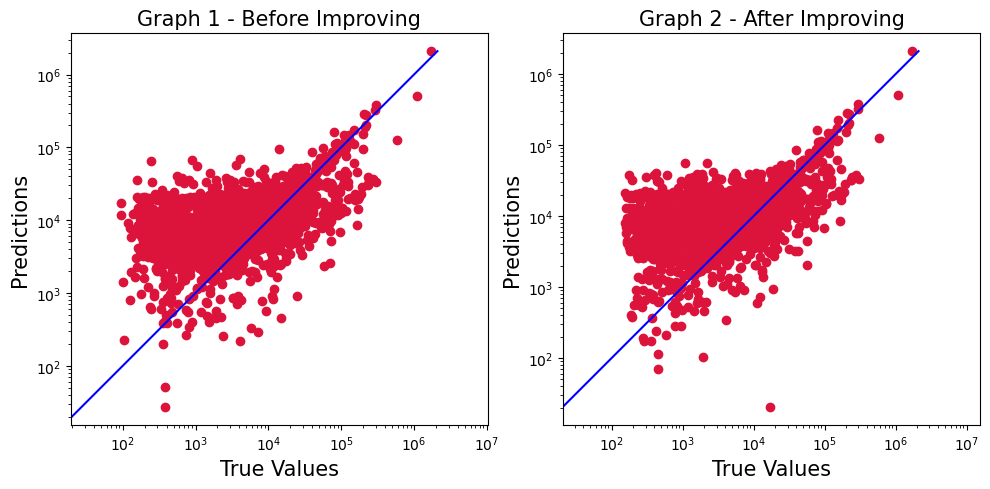

In [40]:

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test1), max(y_pred1))
p2 = min(min(y_test1), min(y_pred1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Graph 1 - Before Improving', fontsize=15)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test2), max(y_pred2))
p2 = min(min(y_test2), min(y_pred2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Graph 2 - After Improving', fontsize=15)
plt.axis('equal')

plt.tight_layout()
plt.show()


To assess the accuracy of the model, the code creates a new DataFrame called dfExamplePred. This DataFrame contains the predicted values ('predicted') and the actual values ('real') from the 'Students Enrolled' column.

To calculate the percentage accuracy, a new column called 'percentage' is added to dfExamplePred. This column is calculated by taking the minimum percentage value between the predicted value divided by the real value and the real value divided by the predicted value. The resulting percentages are multiplied by 100 and rounded to two decimal places.

The dfExamplePred DataFrame provides the predicted values, real values, and the corresponding percentage accuracy for each prediction made by the model.

In [50]:
dfExample = df3.copy()
Real_values = dfExample['Students Enrolled']
dfExample = dfExample.drop(columns = ['Students Enrolled'])
y_pred_example = LM.predict(dfExample)
dfExamplePred = pd.DataFrame({'predicted':y_pred_example.round(2),'real':Real_values})
dfExamplePred['percentage'] = ((pd.DataFrame({'min_percentage': dfExamplePred['predicted'] / dfExamplePred['real'], 'max_percentage': dfExamplePred['real'] / dfExamplePred['predicted']})).min(axis=1) * 100).round(2)

    
dfExamplePred.head(10)

,predicted,real,percentage
0,2103869.75,1721045,81.80
3,912743.61,870059,95.32
4,837576.16,682323,81.46
5,844521.54,734453,86.97
6,829518.29,774929,93.42
7,809108.83,783284,96.81
8,784148.96,940996,83.33
9,604688.10,638319,94.73
11,503144.94,1086534,46.31
12,456384.13,315514,69.13


In [51]:
dfExamplePred = pd.DataFrame({'predicted':y_pred_example.round(2),'real':Real_values})
dfExamplePred['percentage'] = ((pd.DataFrame({'min_percentage': dfExamplePred['predicted'] / dfExamplePred['real'], 'max_percentage': dfExamplePred['real'] / dfExamplePred['predicted']})).min(axis=1) * 100).round(2)

    
dfExamplePred.head(10)

,predicted,real,percentage
0,2103869.75,1721045,81.80
3,912743.61,870059,95.32
4,837576.16,682323,81.46
5,844521.54,734453,86.97
6,829518.29,774929,93.42
7,809108.83,783284,96.81
8,784148.96,940996,83.33
9,604688.10,638319,94.73
11,503144.94,1086534,46.31
12,456384.13,315514,69.13


The code snippet prints the count of rows in the dfExamplePred DataFrame where the percentage accuracy is greater than or equal to 90. It then displays the subset of dfExamplePred where the percentage accuracy meets the specified condition.

In [52]:
print(dfExamplePred[dfExamplePred['percentage'] >=90].count())
dfExamplePred[dfExamplePred['percentage'] >= 90]


predicted     932
real          932
percentage    932
dtype: int64


,predicted,real,percentage
3,912743.61,870059,95.32
6,829518.29,774929,93.42
7,809108.83,783284,96.81
9,604688.10,638319,94.73
13,452640.44,447369,98.84
...,...,...,...
9816,2401.00,2401,100.00
9817,7541.00,7541,100.00
9869,170.00,170,100.00
9883,557.00,557,100.00


This code snippet calculates the feature importances for subcategories and categories using linear regression. It iterates over the subcategory and category columns, extracts the corresponding importances, and stores them in dictionaries. The code then sorts the importances and selects the top 10 subcategories and top 5 categories. Finally, it creates a figure with two subplots displaying bar charts of the importances.

In [53]:
coefficients = LM.coef_
subcategory_importances = {}
category_importances = {}

subcategory_columns = [col for col in X.columns if 'Subcategory' in col]
category_columns = [col for col in X.columns if 'Category' in col]

for col, coef in zip(subcategory_columns, coefficients):
    subcategory = col.split('_')[1]
    subcategory_importances[subcategory] = abs(coef)

for col, coef in zip(category_columns, coefficients):
    category = col.split('_')[1]
    category_importances[category] = abs(coef)

sorted_subcategory_importances = sorted(subcategory_importances.items(), key=lambda x: x[1], reverse=True)
sorted_category_importances = sorted(category_importances.items(), key=lambda x: x[1], reverse=True)


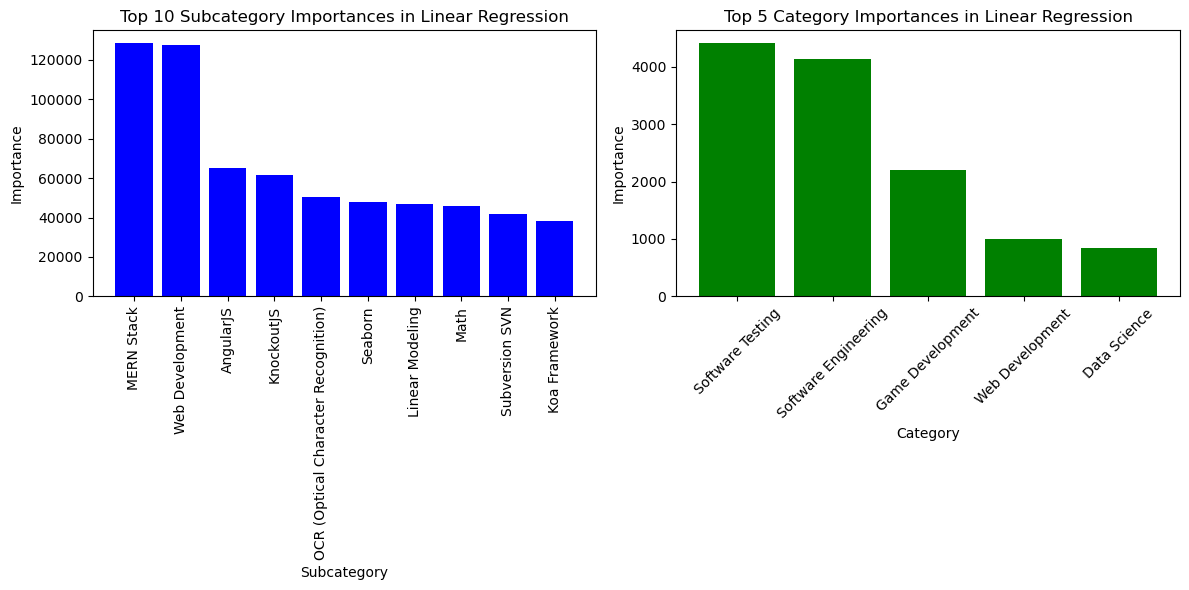

In [54]:
top_10_subcategories, top_10_subcategory_importances = zip(*sorted_subcategory_importances[:10])
top_5_categories, top_5_category_importances = zip(*sorted_category_importances[:5])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_subcategories, top_10_subcategory_importances,color='b')
plt.xlabel('Subcategory')
plt.ylabel('Importance')
plt.title('Top 10 Subcategory Importances in Linear Regression')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(top_5_categories, top_5_category_importances, color='g')
plt.xlabel('Category')
plt.ylabel('Importance')
plt.title('Top 5 Category Importances in Linear Regression')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<p>After conducting the machine learning analysis, we have successfully developed a model that exhibits high accuracy in predicting the success of a course. This outcome demonstrates the effectiveness of our approach in leveraging data and utilizing machine learning techniques to gain insights into course performance. By harnessing the power of data-driven predictions, we can make informed decisions and optimize our strategies to enhance the overall success of future courses.</p>

<h1>Bonus</h1>

We conducted an analysis for fun to explore the impact of focusing on successful cases and building a specialized model. Surprisingly, the new model, created from the plates of the original model we developed, exhibited remarkably high success rates. These results surpassed our expectations and demonstrated the potential of our approach. It's important to note that this analysis was conducted purely for enjoyment and not intended to be the final model for our project. we have included a graph that illustrates the performance differences between three models: one with a 72% success rate, another with 74%, and the latest model achieving an outstanding success rate of 95%. This highlights the effectiveness of targeting successful cases and the substantial progress achieved through our approach.

In [55]:
# Filter rows with accuracy percentages higher than 50
df_Super_Improve = dfExamplePred[dfExamplePred['percentage'] > 50]

X_Super_Improve = df3.loc[df_Super_Improve.index].drop(columns=['Students Enrolled'])
y_Super_Improve = df3.loc[df_Super_Improve.index]['Students Enrolled']

X_train_Super_Improve, X_test_Super_Improve, y_train_Super_Improve, y_test_Super_Improve = train_test_split(X_Super_Improve, y_Super_Improve, test_size=0.2, random_state=42)
LM_Super_Improve = LinearRegression()
LM_Super_Improve.fit(X_train_Super_Improve, y_train_Super_Improve)

y_pred_Super_Improve = LM_Super_Improve.predict(X_test_Super_Improve)
r2_norm_Super_Improve = r2_score(y_test_Super_Improve, y_pred_Super_Improve)
print("Normalized R-squared score on filtered dataset:", r2_norm_Super_Improve.round(4))



Normalized R-squared score on filtered dataset: 0.9527


In [47]:
y_pred_Super_Improve_all = LM_Super_Improve.predict(df3.drop(columns=['Students Enrolled']))

dfSuperImproveML = pd.DataFrame({'predicted': y_pred_Super_Improve_all.round(2), 'real': df3['Students Enrolled']})
dfSuperImproveML['percentage'] = ((pd.DataFrame({'min_percentage': dfSuperImproveML['predicted'] / dfSuperImproveML['real'], 'max_percentage': dfSuperImproveML['real'] / dfSuperImproveML['predicted']})).min(axis=1) * 100).round(2)

dfSuperImproveML


,predicted,real,percentage
0,1939200.53,1721045,88.75
3,851657.74,870059,97.89
4,775498.72,682323,87.99
5,784241.19,734453,93.65
6,772289.61,774929,99.66
...,...,...,...
9892,10488.92,1478,14.09
9894,7883.66,177,2.25
9895,8884.37,292,3.29
9896,2018.07,187,9.27


In [48]:
print(dfSuperImproveML[dfSuperImproveML['percentage'] >=90].count())
dfSuperImproveML[dfSuperImproveML['percentage'] >= 90]


predicted     1051
real          1051
percentage    1051
dtype: int64


,predicted,real,percentage
3,851657.74,870059,97.89
5,784241.19,734453,93.65
6,772289.61,774929,99.66
7,749512.29,783284,95.69
13,422438.74,447369,94.43
...,...,...,...
9793,1058.00,1058,100.00
9816,2401.00,2401,100.00
9817,7541.00,7541,100.00
9869,170.00,170,100.00


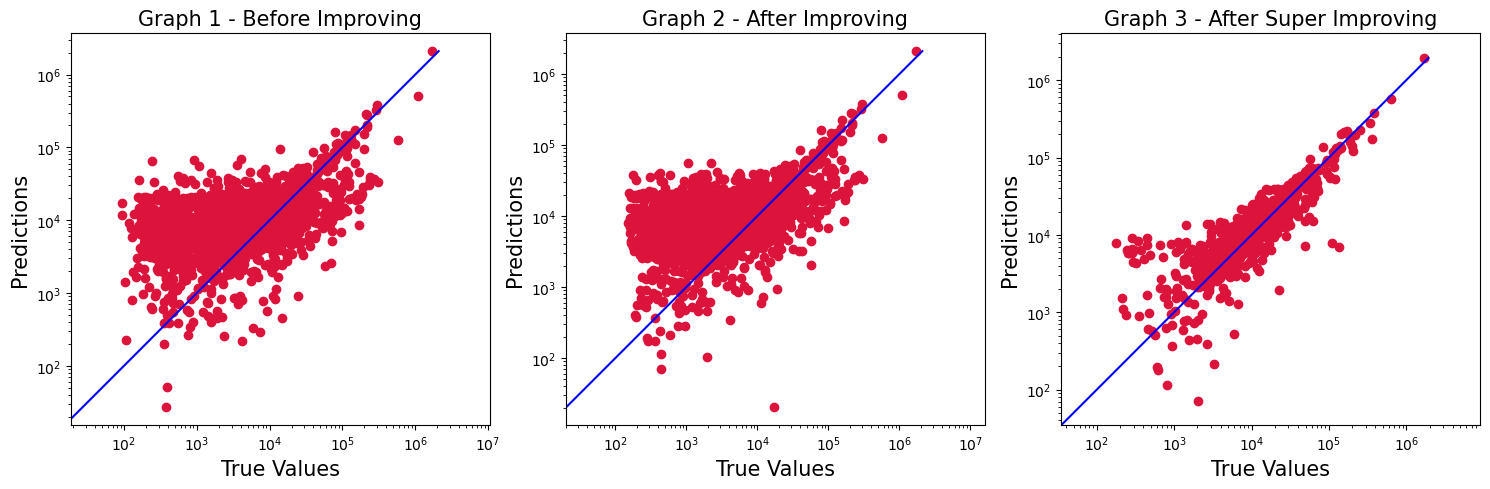

In [49]:
plt.figure(figsize=(15, 5))

# Subplot 1: Predictions before improving
plt.subplot(1, 3, 1)
plt.scatter(y_test1, y_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test1), max(y_pred1))
p2 = min(min(y_test1), min(y_pred1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Graph 1 - Before Improving', fontsize=15)
plt.axis('equal')

# Subplot 2: Predictions after improving
plt.subplot(1, 3, 2)
plt.scatter(y_test2, y_pred2, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test2), max(y_pred2))
p2 = min(min(y_test2), min(y_pred2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Graph 2 - After Improving', fontsize=15)
plt.axis('equal')

# Subplot 3: Predictions after super improving
plt.subplot(1, 3, 3)
plt.scatter(y_test_Super_Improve, y_pred_Super_Improve, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test_Super_Improve), max(y_pred_Super_Improve))
p2 = min(min(y_test_Super_Improve), min(y_pred_Super_Improve))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Graph 3 - After Super Improving', fontsize=15)
plt.axis('equal')

plt.tight_layout()
plt.show()